<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/Tinnitus_Only_Gap_2023_02_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import numpy as np
import pandas as pd
#dataset=pd.read_csv("/content/drive/MyDrive/SNU Research/Tinnitus/Tinnitus_106 feature_ALR_EEG_2023.02.02_OnlyGap_No_n0p1p3.csv")
 
dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/Tinnitus/Tinnitus_106 feature_ALR_EEG_2023.02.08_OnlyGap_No_n0p1p3.csv")

classes = np.array(sorted(list(set(dataset.iloc[:, 0]))))
result = {}

In [12]:
dataset.head()

,Class,Data Partition,ExperimentType,n1_gap_peak_ms_20ms,p2_gap_peak_ms_20ms,n2_gap_peak_ms_20ms,n1p2_interval_gap_20ms,n1n2_interval_gap_20ms,p2n2_interval_gap_20ms,n1_gap_peak_amp_20ms,...,gamma_peak_freq_50ms,alpha_auc_50ms,beta_auc_50ms,gamma_auc_50ms,total_auc_50ms,alpha_peak_auc_50ms,beta_peak_auc_50ms,gamma_peak_auc_50ms,ABR_peak_auc_50ms,ABR_auc_50ms
0,Control,Training,Test,214,263,366,49,152,103,-1.727546,...,33.935547,16.113375,10.274986,2.158507,67.336208,2.009818,0.886997,0.136649,2.265867,1.568214
1,Control,Training,Test,217,301,383,84,166,82,-4.154330,...,33.447266,10.661568,11.481660,2.442587,68.082027,1.106065,0.794547,0.106840,1.392070,0.928574
2,Control,Training,Test,221,305,396,84,175,91,-6.014849,...,34.667969,12.861917,5.695109,1.288528,53.798122,1.803541,0.481627,0.067608,3.744687,2.258415
3,Control,Training,Test,233,268,379,35,146,111,2.425703,...,36.376953,6.525925,4.622184,1.672584,27.156334,0.771864,0.334392,0.066847,2.308262,1.411870
4,Control,Training,Test,224,264,337,40,113,73,1.858904,...,33.935547,13.086656,9.183723,2.066551,48.711556,1.453007,0.506619,0.092683,2.868045,1.424984


In [13]:
set(list(dataset['Class']))

{'Control', 'Tinnitus'}

In [14]:

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset.iloc[:, 0]=encoder.fit_transform(dataset.iloc[:, 0])

In [15]:
set(list(dataset['Class']))

{0, 1}

In [16]:
X_ = dataset.iloc[:,3:]
y_ = dataset.iloc[:, 0]
col=list(dataset.iloc[0:0,3:])

# **Feature Check Box**

In [ ]:
def feature_check_box(X_):
  import ipywidgets as widgets
  from IPython.display import display
  new_keys=[]
  for i in X_:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys

In [ ]:
features=feature_check_box(X_)

Checkbox(value=False, description='n1_gap_peak_ms_20ms', indent=False)

Checkbox(value=False, description='p2_gap_peak_ms_20ms', indent=False)

Checkbox(value=False, description='n2_gap_peak_ms_20ms', indent=False)

Checkbox(value=False, description='n1p2_interval_gap_20ms', indent=False)

Checkbox(value=False, description='n1n2_interval_gap_20ms', indent=False)

Checkbox(value=False, description='p2n2_interval_gap_20ms', indent=False)

Checkbox(value=False, description='n1_gap_peak_amp_20ms', indent=False)

Checkbox(value=False, description='p2_gap_peak_amp_20ms', indent=False)

Checkbox(value=False, description='n2_gap_peak_amp_20ms', indent=False)

Checkbox(value=False, description='n1p2_gap_diff_20ms', indent=False)

Checkbox(value=False, description='p2n2_gap_diff_20ms', indent=False)

Checkbox(value=False, description='n1p2_gap_nogap_diff_20ms', indent=False)

Checkbox(value=False, description='p2n2_gap_nogap_diff_20ms', indent=False)

Checkbox(value=False, description='n1p2_gap_no_gap_ratio_20ms', indent=False)

Checkbox(value=False, description='p2n2_gap_no_gap_ratio_20ms', indent=False)

Checkbox(value=False, description='gap_auc_n1p2_LO_20ms', indent=False)

Checkbox(value=False, description='gap_auc_n1p2_UP_20ms', indent=False)

Checkbox(value=False, description='gap_auc_p2n2_UP_20ms', indent=False)

Checkbox(value=False, description='gap_auc_n1p2n2_20ms', indent=False)

Checkbox(value=False, description='gap_auc_total_20ms', indent=False)

Checkbox(value=False, description='gap_auc_total_abs_20ms', indent=False)

Checkbox(value=False, description='gap_auc_n1p2n2_by_total_20ms', indent=False)

Checkbox(value=False, description='alpha_peak_amp_20ms', indent=False)

Checkbox(value=False, description='alpha_peak_freq_20ms', indent=False)

Checkbox(value=False, description='beta_peak_amp_20ms', indent=False)

Checkbox(value=False, description='beta_peak_freq_20ms', indent=False)

Checkbox(value=False, description='gamma_peak_amp_20ms', indent=False)

Checkbox(value=False, description='gamma_peak_freq_20ms', indent=False)

Checkbox(value=False, description='alpha_auc_20ms', indent=False)

Checkbox(value=False, description='beta_auc_20ms', indent=False)

Checkbox(value=False, description='gamma_auc_20ms', indent=False)

Checkbox(value=False, description='total_auc_20ms', indent=False)

Checkbox(value=False, description='alpha_peak_auc_20ms', indent=False)

Checkbox(value=False, description='beta_peak_auc_20ms', indent=False)

Checkbox(value=False, description='gamma_peak_auc_20ms', indent=False)

Checkbox(value=False, description='ABR_peak_auc_20ms', indent=False)

Checkbox(value=False, description='ABR_auc_20ms', indent=False)

Checkbox(value=False, description='n1_gap_peak_ms_50ms', indent=False)

Checkbox(value=False, description='p2_gap_peak_ms_50ms', indent=False)

Checkbox(value=False, description='n2_gap_peak_ms_50ms', indent=False)

Checkbox(value=False, description='n1p2_interval_gap_50ms', indent=False)

Checkbox(value=False, description='n1n2_interval_gap_50ms', indent=False)

Checkbox(value=False, description='p2n2_interval_gap_50ms', indent=False)

Checkbox(value=False, description='n1_gap_peak_amp_50ms', indent=False)

Checkbox(value=False, description='p2_gap_peak_amp_50ms', indent=False)

Checkbox(value=False, description='n2_gap_peak_amp_50ms', indent=False)

Checkbox(value=False, description='n1p2_gap_diff_50ms', indent=False)

Checkbox(value=False, description='p2n2_gap_diff_50ms', indent=False)

Checkbox(value=False, description='n1p2_gap_nogap_diff_50ms', indent=False)

Checkbox(value=False, description='p2n2_gap_nogap_diff_50ms', indent=False)

Checkbox(value=False, description='n1p2_gap_no_gap_ratio_50ms', indent=False)

Checkbox(value=False, description='p2n2_gap_no_gap_ratio_50ms', indent=False)

Checkbox(value=False, description='gap_auc_n1p2_LO_50ms', indent=False)

Checkbox(value=False, description='gap_auc_n1p2_UP_50ms', indent=False)

Checkbox(value=False, description='gap_auc_p2n2_UP_50ms', indent=False)

Checkbox(value=False, description='gap_auc_n1p2n2_50ms', indent=False)

Checkbox(value=False, description='gap_auc_total_50ms', indent=False)

Checkbox(value=False, description='gap_auc_total_abs_50ms', indent=False)

Checkbox(value=False, description='gap_auc_n1p2n2_by_total_50ms', indent=False)

Checkbox(value=False, description='alpha_peak_amp_50ms', indent=False)

Checkbox(value=False, description='alpha_peak_freq_50ms', indent=False)

Checkbox(value=False, description='beta_peak_amp_50ms', indent=False)

Checkbox(value=False, description='beta_peak_freq_50ms', indent=False)

Checkbox(value=False, description='gamma_peak_amp_50ms', indent=False)

Checkbox(value=False, description='gamma_peak_freq_50ms', indent=False)

Checkbox(value=False, description='alpha_auc_50ms', indent=False)

Checkbox(value=False, description='beta_auc_50ms', indent=False)

Checkbox(value=False, description='gamma_auc_50ms', indent=False)

Checkbox(value=False, description='total_auc_50ms', indent=False)

Checkbox(value=False, description='alpha_peak_auc_50ms', indent=False)

Checkbox(value=False, description='beta_peak_auc_50ms', indent=False)

Checkbox(value=False, description='gamma_peak_auc_50ms', indent=False)

Checkbox(value=False, description='ABR_peak_auc_50ms', indent=False)

Checkbox(value=False, description='ABR_auc_50ms', indent=False)

#Data Spliting

You can remove it. I added for not to input all the features for every runtime

In [17]:
list_of_feat2=[   
'p2_gap_peak_amp_50ms',
'p2n2_gap_diff_20ms',
'p2n2_gap_diff_50ms',
'p2n2_interval_gap_50ms',
'n2_gap_peak_amp_20ms',
'gap_auc_n1p2n2_by_total_20ms',
'n1_gap_peak_ms_20ms',
'gap_auc_n1p2n2_by_total_50ms',
'n1p2_gap_no_gap_ratio_50ms',
'gap_auc_p2n2_UP_20ms',
'gap_auc_p2n2_UP_50ms',
'n2_gap_peak_ms_50ms',
'gap_auc_n1p2n2_20ms',
'n1p2_gap_diff_50ms',
'gap_auc_total_abs_20ms',
'n1_gap_peak_ms_50ms',
'n1p2_gap_no_gap_ratio_20ms',
'alpha_peak_auc_50ms',
'gamma_peak_freq_50ms',
'ABR_peak_auc_50ms'
    ]

print(len(list_of_feat2))

20


In [30]:
list_of_feat3=[  
'p2n2_gap_diff_50ms',
'p2_gap_peak_amp_50ms',
'gap_auc_n1p2n2_by_total_20ms',
'gap_auc_n1p2n2_by_total_50ms',
'p2n2_gap_diff_20ms',
'n1_gap_peak_ms_20ms',
'n2_gap_peak_amp_20ms',
'gap_auc_n1p2n2_50ms',
'gap_auc_n1p2_UP_50ms',
'gap_auc_n1p2_LO_50ms',
'gap_auc_n1p2n2_20ms',
'n1_gap_peak_ms_50ms',
'gap_auc_p2n2_UP_50ms',
'n1p2_gap_no_gap_ratio_20ms',
'p2_gap_peak_amp_20ms',
'alpha_peak_auc_50ms',
'gamma_peak_freq_20ms'
    ]

print(len(list_of_feat3))

17


In [31]:
X_new = dataset[list_of_feat3]
y_new = dataset.iloc[:, 0]

In [ ]:
'''from sklearn.model_selection import train_test_split
X_train_with_subject, X_test_with_subject, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.10655737705, random_state = 0)'''

'from sklearn.model_selection import train_test_split\nX_train_with_subject, X_test_with_subject, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.10655737705, random_state = 0)'

In [32]:
X_train=X_new.iloc[:133,:]  
X_test=X_new.iloc[133:,:]
y_train=y_new.iloc[:133]
y_test=y_new.iloc[133:]

#ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_defult = AdaBoostClassifier(random_state=0)
ada_defult.fit(X_train, y_train)
y_pred = ada_defult.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_defult,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)


[[12  5]
 [ 6  9]]
              precision    recall  f1-score   support

           0       0.67      0.71      0.69        17
           1       0.64      0.60      0.62        15

    accuracy                           0.66        32
   macro avg       0.65      0.65      0.65        32
weighted avg       0.66      0.66      0.66        32

Accurecy:  0.65625


1/200 round completed......................... Accurecy: 0.59375
2/200 round completed......................... Accurecy: 0.625
3/200 round completed......................... Accurecy: 0.59375
4/200 round completed......................... Accurecy: 0.59375
5/200 round completed......................... Accurecy: 0.59375
6/200 round completed......................... Accurecy: 0.59375
7/200 round completed......................... Accurecy: 0.625
8/200 round completed......................... Accurecy: 0.59375
9/200 round completed......................... Accurecy: 0.625
10/200 round completed......................... Accurecy: 0.625
11/200 round completed......................... Accurecy: 0.65625
12/200 round completed......................... Accurecy: 0.625
13/200 round completed......................... Accurecy: 0.625
14/200 round completed......................... Accurecy: 0.65625
15/200 round completed......................... Accurecy: 0.625
16/200 round completed...........

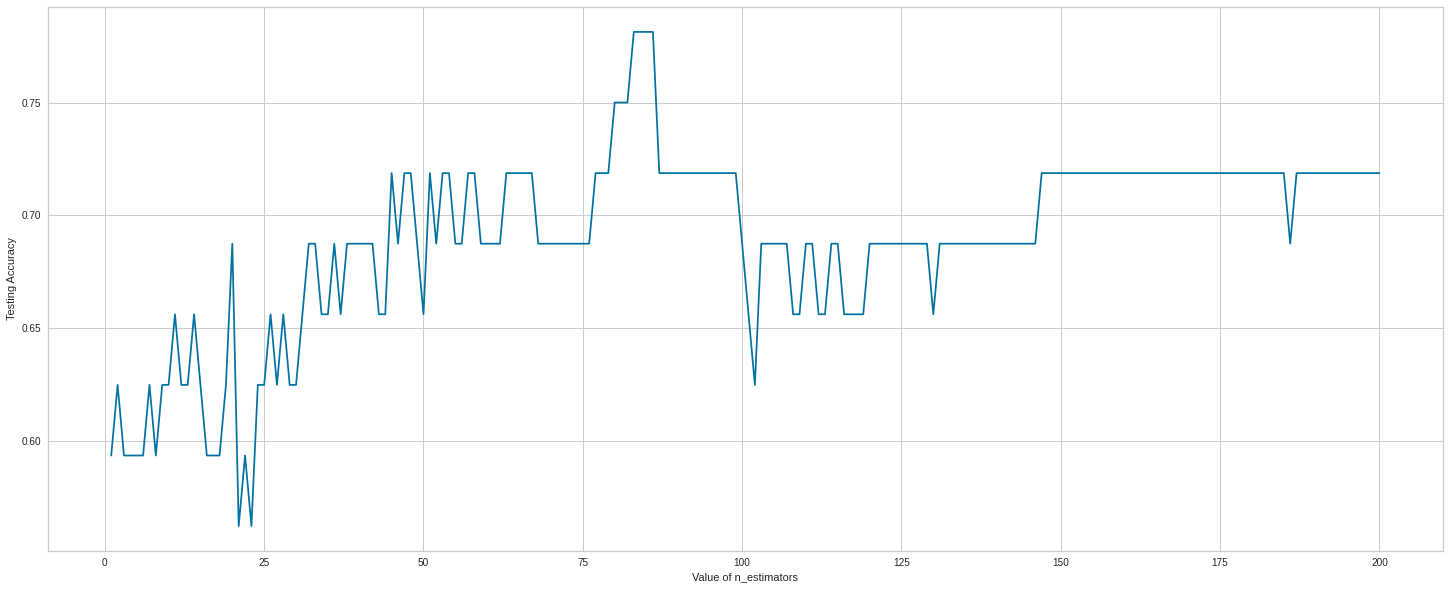

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
N=200
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_best_estimator = AdaBoostClassifier(n_estimators=best_estimator,random_state=0)
ada_best_estimator.fit(X_train, y_train)
y_pred = ada_best_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_best_estimator,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)

[[13  4]
 [ 3 12]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.79        17
           1       0.75      0.80      0.77        15

    accuracy                           0.78        32
   macro avg       0.78      0.78      0.78        32
weighted avg       0.78      0.78      0.78        32

Accurecy:  0.78125




---



---



#Graddient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

gradBoost_default = GradientBoostingClassifier(random_state=0)
gradBoost_default.fit(X_train, y_train)
y_pred = gradBoost_default.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_default,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[12  5]
 [ 7  8]]
              precision    recall  f1-score   support

           0       0.63      0.71      0.67        17
           1       0.62      0.53      0.57        15

    accuracy                           0.62        32
   macro avg       0.62      0.62      0.62        32
weighted avg       0.62      0.62      0.62        32

Accurecy:  0.625


1/150 round completed......................... Accurecy: 0.625
2/150 round completed......................... Accurecy: 0.5625
3/150 round completed......................... Accurecy: 0.59375
4/150 round completed......................... Accurecy: 0.625
5/150 round completed......................... Accurecy: 0.625
6/150 round completed......................... Accurecy: 0.59375
7/150 round completed......................... Accurecy: 0.59375
8/150 round completed......................... Accurecy: 0.59375
9/150 round completed......................... Accurecy: 0.5625
10/150 round completed......................... Accurecy: 0.59375
11/150 round completed......................... Accurecy: 0.59375
12/150 round completed......................... Accurecy: 0.59375
13/150 round completed......................... Accurecy: 0.59375
14/150 round completed......................... Accurecy: 0.59375
15/150 round completed......................... Accurecy: 0.59375
16/150 round completed.....

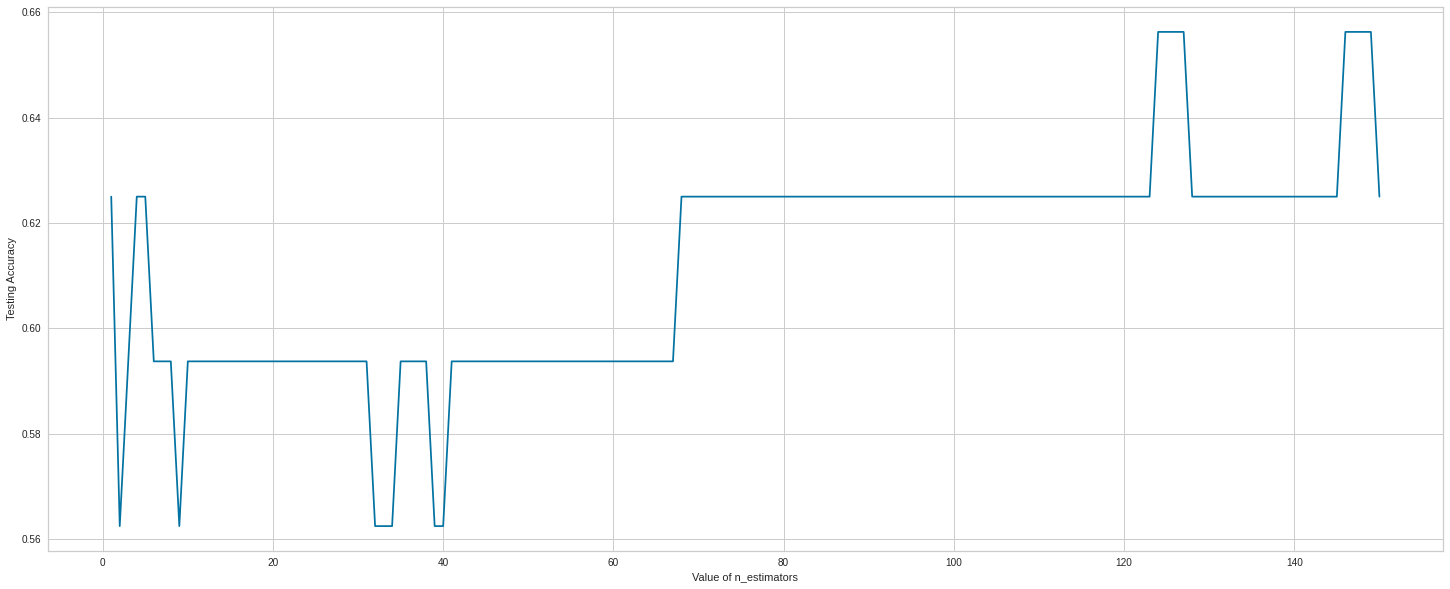

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/30 round completed......................... Accurecy: 0.59375
2/30 round completed......................... Accurecy: 0.65625
3/30 round completed......................... Accurecy: 0.625
4/30 round completed......................... Accurecy: 0.59375
5/30 round completed......................... Accurecy: 0.625
6/30 round completed......................... Accurecy: 0.5625
7/30 round completed......................... Accurecy: 0.625
8/30 round completed......................... Accurecy: 0.625
9/30 round completed......................... Accurecy: 0.625
10/30 round completed......................... Accurecy: 0.625
11/30 round completed......................... Accurecy: 0.625
12/30 round completed......................... Accurecy: 0.625
13/30 round completed......................... Accurecy: 0.625
14/30 round completed......................... Accurecy: 0.625
15/30 round completed......................... Accurecy: 0.625
16/30 round completed......................... Accurecy: 

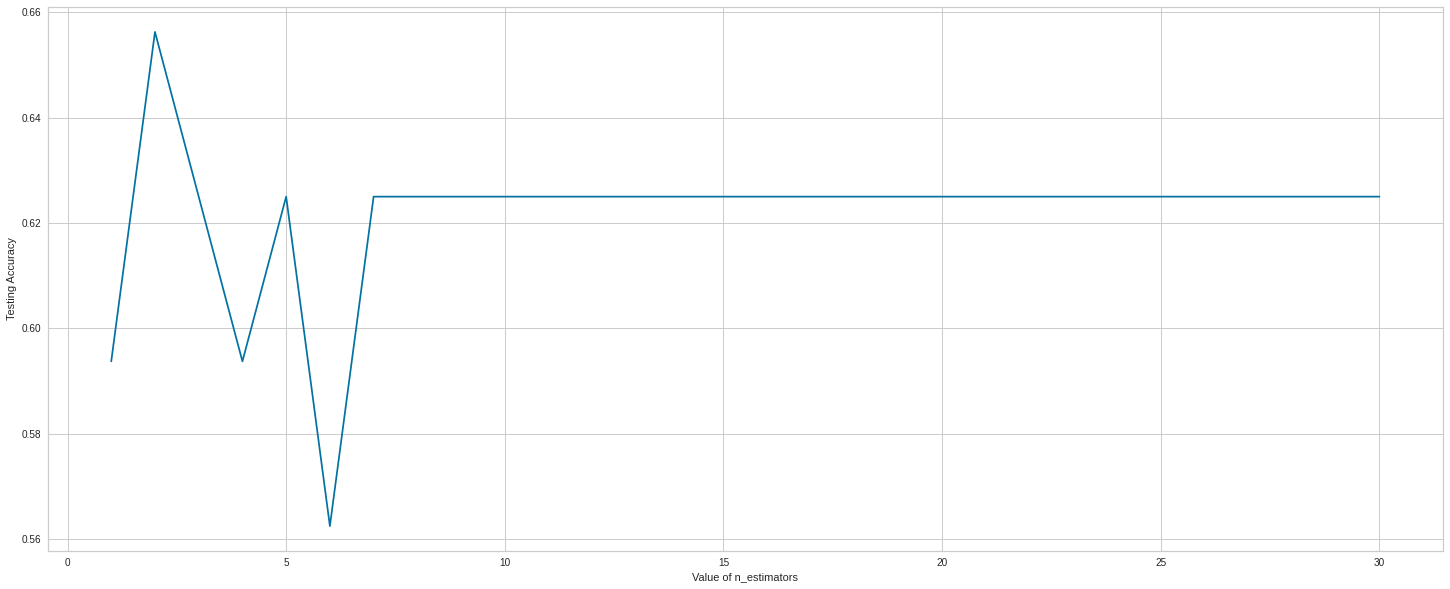

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_estimator = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
gradBoost_estimator.fit(X_train, y_train)
y_pred = gradBoost_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_estimator,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[12  5]
 [ 6  9]]
              precision    recall  f1-score   support

           0       0.67      0.71      0.69        17
           1       0.64      0.60      0.62        15

    accuracy                           0.66        32
   macro avg       0.65      0.65      0.65        32
weighted avg       0.66      0.66      0.66        32

Accurecy:  0.65625


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_depth = GradientBoostingClassifier(max_depth=best_depth,random_state=0)
gradBoost_depth.fit(X_train, y_train)
y_pred = gradBoost_depth.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_depth,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[12  5]
 [ 6  9]]
              precision    recall  f1-score   support

           0       0.67      0.71      0.69        17
           1       0.64      0.60      0.62        15

    accuracy                           0.66        32
   macro avg       0.65      0.65      0.65        32
weighted avg       0.66      0.66      0.66        32

Accurecy:  0.65625


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_all = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
gradBoost_all.fit(X_train, y_train)
y_pred = gradBoost_all.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_all,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[12  5]
 [ 5 10]]
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        17
           1       0.67      0.67      0.67        15

    accuracy                           0.69        32
   macro avg       0.69      0.69      0.69        32
weighted avg       0.69      0.69      0.69        32

Accurecy:  0.6875




---



---



#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier(random_state=0)
rf_default.fit(X_train, y_train)
y_pred=rf_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_default,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[11  6]
 [ 8  7]]
              precision    recall  f1-score   support

           0       0.58      0.65      0.61        17
           1       0.54      0.47      0.50        15

    accuracy                           0.56        32
   macro avg       0.56      0.56      0.56        32
weighted avg       0.56      0.56      0.56        32

Accurecy:  0.5625


1/150 round completed......................... Accurecy: 0.5
2/150 round completed......................... Accurecy: 0.46875
3/150 round completed......................... Accurecy: 0.5625
4/150 round completed......................... Accurecy: 0.53125
5/150 round completed......................... Accurecy: 0.53125
6/150 round completed......................... Accurecy: 0.59375
7/150 round completed......................... Accurecy: 0.53125
8/150 round completed......................... Accurecy: 0.625
9/150 round completed......................... Accurecy: 0.625
10/150 round completed......................... Accurecy: 0.625
11/150 round completed......................... Accurecy: 0.5625
12/150 round completed......................... Accurecy: 0.59375
13/150 round completed......................... Accurecy: 0.59375
14/150 round completed......................... Accurecy: 0.59375
15/150 round completed......................... Accurecy: 0.625
16/150 round completed...........

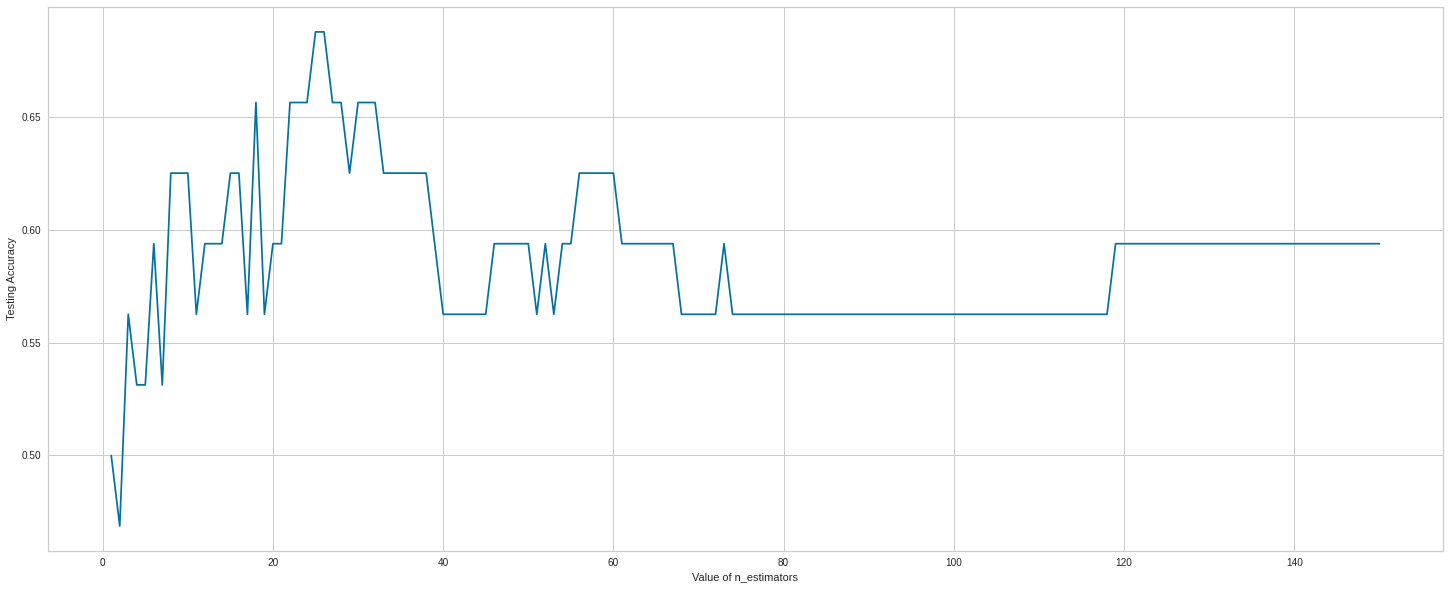

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/150 round completed......................... Accurecy: 0.59375
2/150 round completed......................... Accurecy: 0.59375
3/150 round completed......................... Accurecy: 0.65625
4/150 round completed......................... Accurecy: 0.5625
5/150 round completed......................... Accurecy: 0.59375
6/150 round completed......................... Accurecy: 0.59375
7/150 round completed......................... Accurecy: 0.5625
8/150 round completed......................... Accurecy: 0.5625
9/150 round completed......................... Accurecy: 0.5625
10/150 round completed......................... Accurecy: 0.5625
11/150 round completed......................... Accurecy: 0.5625
12/150 round completed......................... Accurecy: 0.5625
13/150 round completed......................... Accurecy: 0.5625
14/150 round completed......................... Accurecy: 0.5625
15/150 round completed......................... Accurecy: 0.5625
16/150 round completed.......

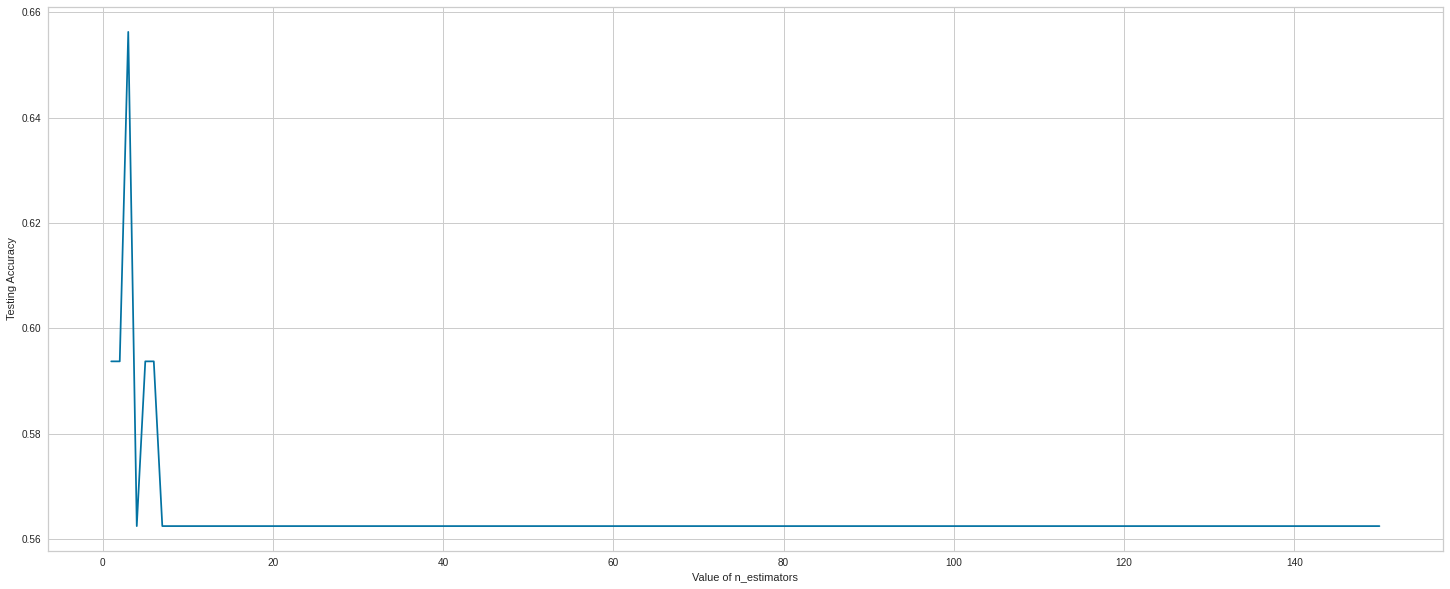

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_estimator,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[14  3]
 [ 7  8]]
              precision    recall  f1-score   support

           0       0.67      0.82      0.74        17
           1       0.73      0.53      0.62        15

    accuracy                           0.69        32
   macro avg       0.70      0.68      0.68        32
weighted avg       0.70      0.69      0.68        32

Accurecy:  0.6875


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_depth,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[11  6]
 [ 5 10]]
              precision    recall  f1-score   support

           0       0.69      0.65      0.67        17
           1       0.62      0.67      0.65        15

    accuracy                           0.66        32
   macro avg       0.66      0.66      0.66        32
weighted avg       0.66      0.66      0.66        32

Accurecy:  0.65625


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_all,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[11  6]
 [ 5 10]]
              precision    recall  f1-score   support

           0       0.69      0.65      0.67        17
           1       0.62      0.67      0.65        15

    accuracy                           0.66        32
   macro avg       0.66      0.66      0.66        32
weighted avg       0.66      0.66      0.66        32

Accurecy:  0.65625




---



---



#XGB

In [ ]:
import xgboost as xgb
xgb_deafult = xgb.XGBClassifier(random_state=0)
xgb_deafult.fit(X_train,y_train)
y_pred = xgb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_deafult,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[12  5]
 [ 7  8]]
              precision    recall  f1-score   support

           0       0.63      0.71      0.67        17
           1       0.62      0.53      0.57        15

    accuracy                           0.62        32
   macro avg       0.62      0.62      0.62        32
weighted avg       0.62      0.62      0.62        32

Accurecy:  0.625


1/250 round completed......................... Accurecy: 0.59375
2/250 round completed......................... Accurecy: 0.625
3/250 round completed......................... Accurecy: 0.65625
4/250 round completed......................... Accurecy: 0.65625
5/250 round completed......................... Accurecy: 0.59375
6/250 round completed......................... Accurecy: 0.59375
7/250 round completed......................... Accurecy: 0.625
8/250 round completed......................... Accurecy: 0.625
9/250 round completed......................... Accurecy: 0.625
10/250 round completed......................... Accurecy: 0.625
11/250 round completed......................... Accurecy: 0.625
12/250 round completed......................... Accurecy: 0.625
13/250 round completed......................... Accurecy: 0.625
14/250 round completed......................... Accurecy: 0.625
15/250 round completed......................... Accurecy: 0.625
16/250 round completed.................

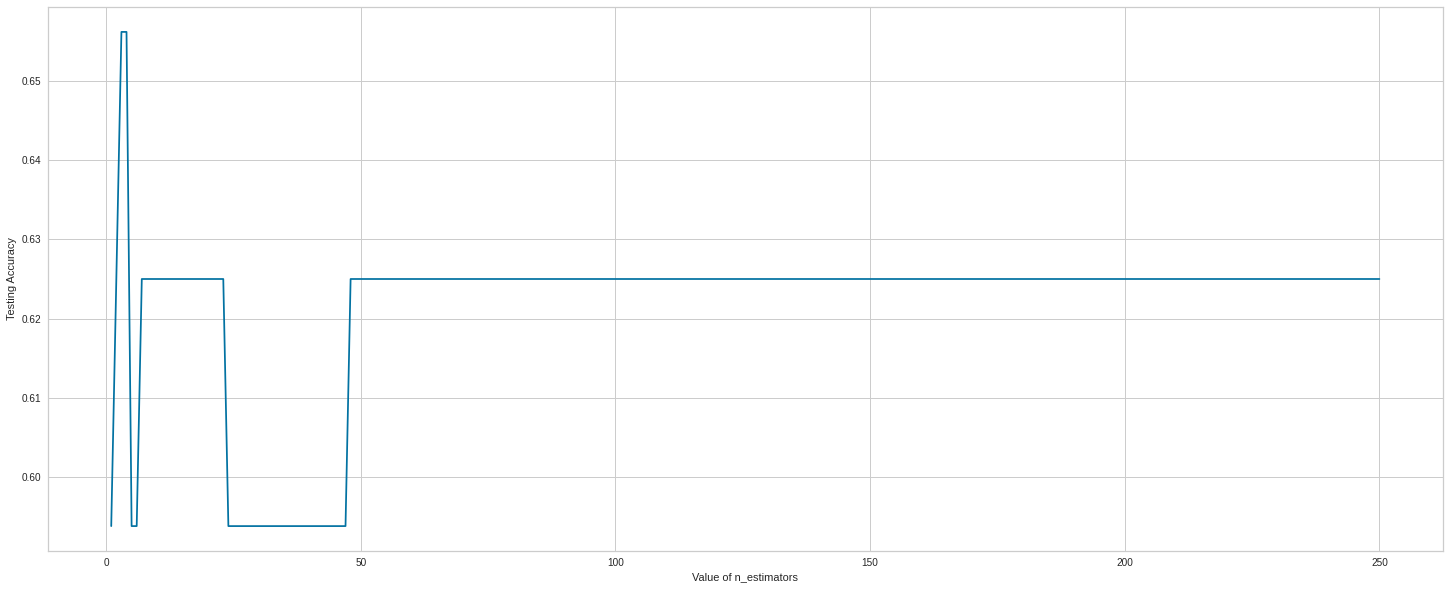

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/250 round completed......................... Accurecy: 0.59375
2/250 round completed......................... Accurecy: 0.59375
3/250 round completed......................... Accurecy: 0.625
4/250 round completed......................... Accurecy: 0.625
5/250 round completed......................... Accurecy: 0.625
6/250 round completed......................... Accurecy: 0.625
7/250 round completed......................... Accurecy: 0.625
8/250 round completed......................... Accurecy: 0.625
9/250 round completed......................... Accurecy: 0.625
10/250 round completed......................... Accurecy: 0.625
11/250 round completed......................... Accurecy: 0.625
12/250 round completed......................... Accurecy: 0.625
13/250 round completed......................... Accurecy: 0.625
14/250 round completed......................... Accurecy: 0.625
15/250 round completed......................... Accurecy: 0.625
16/250 round completed.......................

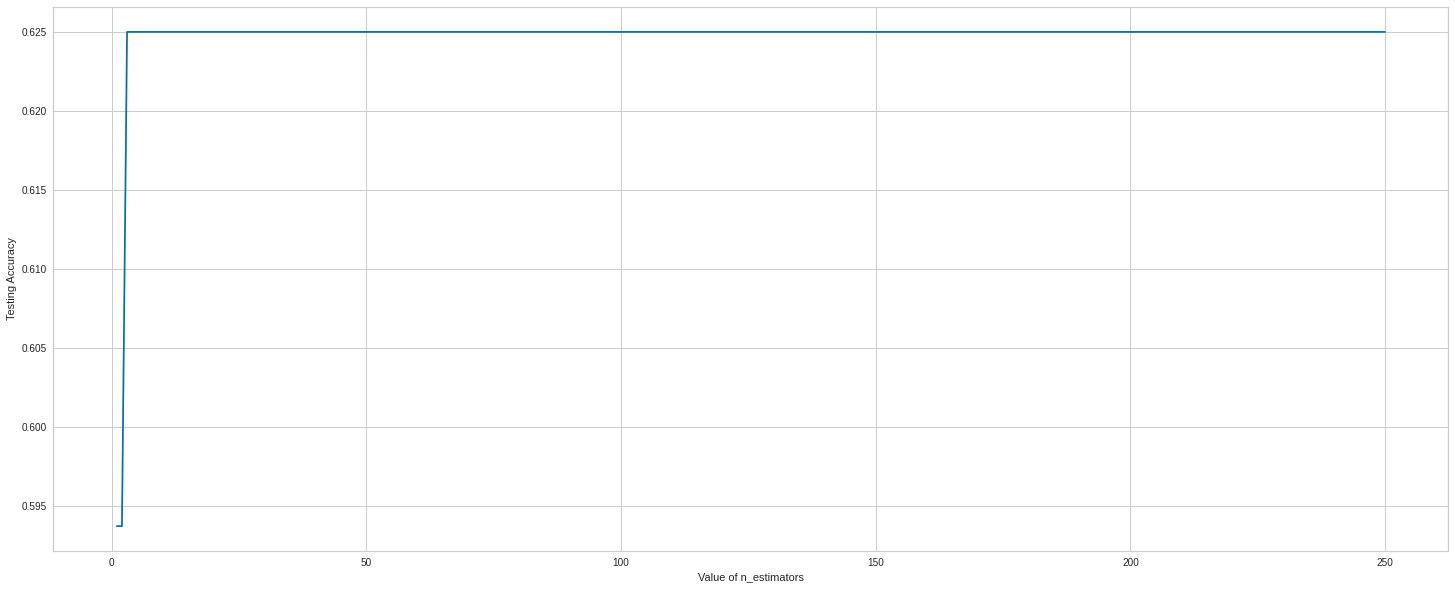

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
import xgboost as xgb
xgb_depth = xgb.XGBClassifier(max_depth=best_depth,random_state=0)
xgb_depth.fit(X_train,y_train)
y_pred = xgb_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_depth,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_depth)

[[12  5]
 [ 7  8]]
              precision    recall  f1-score   support

           0       0.63      0.71      0.67        17
           1       0.62      0.53      0.57        15

    accuracy                           0.62        32
   macro avg       0.62      0.62      0.62        32
weighted avg       0.62      0.62      0.62        32

Accurecy:  0.625
XGBClassifier()


In [ ]:
import xgboost as xgb
xgb_estimator = xgb.XGBClassifier(n_estimators=best_estimator,random_state=0)
xgb_estimator.fit(X_train,y_train)
y_pred = xgb_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_estimator,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_estimator)

[[12  5]
 [ 6  9]]
              precision    recall  f1-score   support

           0       0.67      0.71      0.69        17
           1       0.64      0.60      0.62        15

    accuracy                           0.66        32
   macro avg       0.65      0.65      0.65        32
weighted avg       0.66      0.66      0.66        32

Accurecy:  0.65625
XGBClassifier(n_estimators=3)


In [ ]:
import xgboost as xgb
xgb_all = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
xgb_all.fit(X_train,y_train)
y_pred = xgb_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_all,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[12  5]
 [ 6  9]]
              precision    recall  f1-score   support

           0       0.67      0.71      0.69        17
           1       0.64      0.60      0.62        15

    accuracy                           0.66        32
   macro avg       0.65      0.65      0.65        32
weighted avg       0.66      0.66      0.66        32

Accurecy:  0.65625


#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
y_pred=knn_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_default,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[10  7]
 [ 5 10]]
              precision    recall  f1-score   support

           0       0.67      0.59      0.62        17
           1       0.59      0.67      0.62        15

    accuracy                           0.62        32
   macro avg       0.63      0.63      0.62        32
weighted avg       0.63      0.62      0.62        32

Accurecy:  0.625


1/105 round completed......................... Accurecy: 0.6875
2/105 round completed......................... Accurecy: 0.65625
3/105 round completed......................... Accurecy: 0.65625
4/105 round completed......................... Accurecy: 0.71875
5/105 round completed......................... Accurecy: 0.625
6/105 round completed......................... Accurecy: 0.625
7/105 round completed......................... Accurecy: 0.65625
8/105 round completed......................... Accurecy: 0.59375
9/105 round completed......................... Accurecy: 0.5625
10/105 round completed......................... Accurecy: 0.5625
11/105 round completed......................... Accurecy: 0.53125
12/105 round completed......................... Accurecy: 0.53125
13/105 round completed......................... Accurecy: 0.5625
14/105 round completed......................... Accurecy: 0.59375
15/105 round completed......................... Accurecy: 0.5625
16/105 round completed......

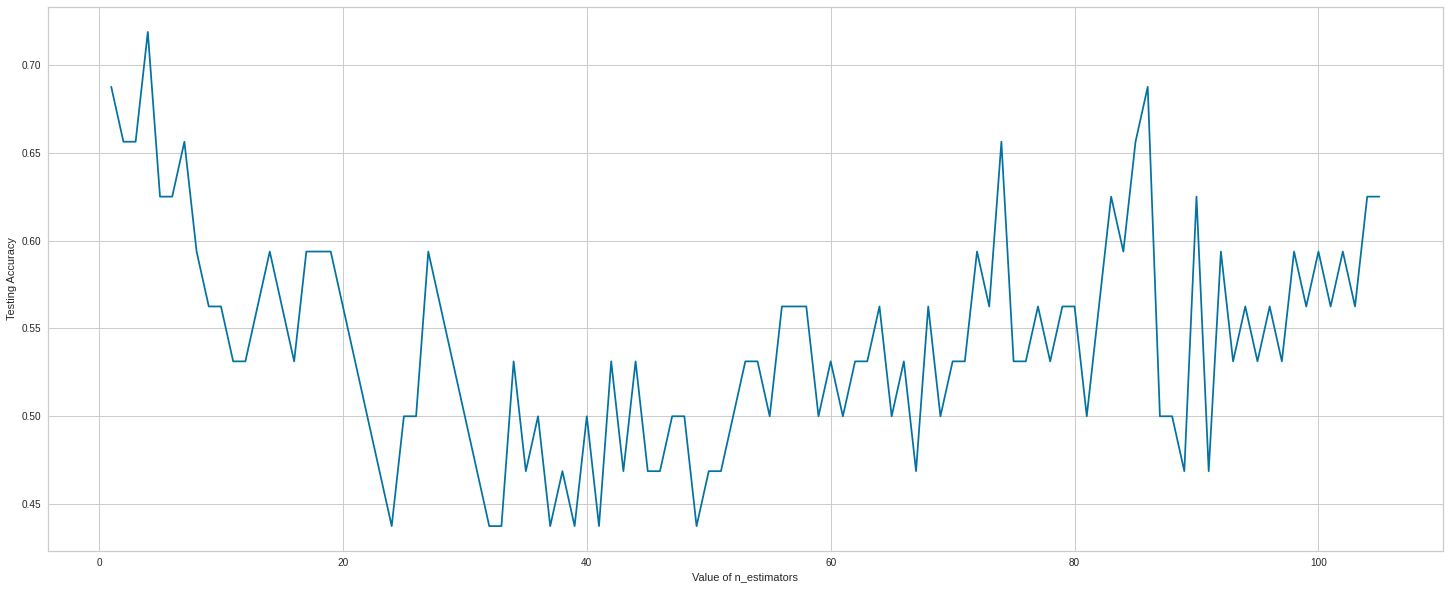

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Neighbors=105
k_range = range (1,Neighbors+1)
scores={}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred=knn.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(Neighbors)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best=list(scores.keys())[scores_list.index(max(scores_list))]
print(best)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_neighbors = KNeighborsClassifier(n_neighbors=best)
knn_neighbors.fit(X_train, y_train)
y_pred=knn_neighbors.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_neighbors,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[14  3]
 [ 6  9]]
              precision    recall  f1-score   support

           0       0.70      0.82      0.76        17
           1       0.75      0.60      0.67        15

    accuracy                           0.72        32
   macro avg       0.72      0.71      0.71        32
weighted avg       0.72      0.72      0.71        32

Accurecy:  0.71875


#NB

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_deafult = GaussianNB()
nb_deafult.fit(X_train, y_train)
y_pred = nb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(nb_deafult,6,'GaussianNB')]=accuracy_score(y_test, y_pred)

[[14  3]
 [ 6  9]]
              precision    recall  f1-score   support

           0       0.70      0.82      0.76        17
           1       0.75      0.60      0.67        15

    accuracy                           0.72        32
   macro avg       0.72      0.71      0.71        32
weighted avg       0.72      0.72      0.71        32

Accurecy:  0.71875


#Histogram-Based Gradient Boosting

In [33]:
from sklearn.ensemble import HistGradientBoostingClassifier

hisgradBoost_default = HistGradientBoostingClassifier(random_state=0)
hisgradBoost_default.fit(X_train, y_train)
y_pred = hisgradBoost_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(hisgradBoost_default,7,'HistGradientBoostingClassifier')]=accuracy_score(y_test, y_pred)


[[14  3]
 [ 8  7]]
              precision    recall  f1-score   support

           0       0.64      0.82      0.72        17
           1       0.70      0.47      0.56        15

    accuracy                           0.66        32
   macro avg       0.67      0.65      0.64        32
weighted avg       0.67      0.66      0.64        32

Accurecy:  0.65625


In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=1000
k_range = range (100,N+1,100)
scores={}
scores_list = []
for k in k_range:
  hisgradBoost_cls = HistGradientBoostingClassifier(max_iter=k,random_state=0)
  hisgradBoost_cls.fit(X_train, y_train)
  y_pred=hisgradBoost_cls.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best max_iter:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=50
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  hisgradBoost_cls = HistGradientBoostingClassifier(max_depth=k,random_state=0)
  hisgradBoost_cls.fit(X_train, y_train)
  y_pred=hisgradBoost_cls.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best max_depth:")
max_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(max_depth)

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

hisgradBoost_max_iter = HistGradientBoostingClassifier(max_iter=best_estimator,random_state=0)
hisgradBoost_max_iter.fit(X_train, y_train)
y_pred = hisgradBoost_max_iter.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(hisgradBoost_max_iter,8,'HistGradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

hisgradBoost_max_depth = HistGradientBoostingClassifier(max_depth=max_depth,random_state=0)
hisgradBoost_max_depth.fit(X_train, y_train)
y_pred = hisgradBoost_max_depth.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(hisgradBoost_max_depth,9,'HistGradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

hisgradBoost_all = HistGradientBoostingClassifier(max_iter=best_estimator,max_depth=max_depth,random_state=0)
hisgradBoost_all.fit(X_train, y_train)
y_pred = hisgradBoost_all.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(hisgradBoost_all,10,'HistGradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

#Catboost

In [42]:
!pip install catboost

from catboost import CatBoostClassifier
cat_default=CatBoostClassifier()
cat_default.fit(X_train, y_train)
y_pred = cat_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[("cat_default",11,'CatBoostClassifier')]=accuracy_score(y_test, y_pred)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Learning rate set to 0.004353
0:	learn: 0.6909329	total: 6.42ms	remaining: 6.41s
1:	learn: 0.6882079	total: 8.93ms	remaining: 4.46s
2:	learn: 0.6864340	total: 11.7ms	remaining: 3.88s
3:	learn: 0.6841041	total: 14.4ms	remaining: 3.59s
4:	learn: 0.6822939	total: 17.4ms	remaining: 3.46s
5:	learn: 0.6799268	total: 20.3ms	remaining: 3.37s
6:	learn: 0.6782363	total: 23.3ms	remaining: 3.31s
7:	learn: 0.6757880	total: 26.3ms	remaining: 3.25s
8:	learn: 0.6733330	total: 29.1ms	remaining: 3.21s
9:	learn: 0.6716437	total: 31.8ms	remaining: 3.15s
10:	learn: 0.6698838	total: 34.4ms	remaining: 3.09s
11:	learn: 0.6684288	total: 37.2ms	remaining: 3.06s
12:	learn: 0.6658381	total: 40ms	remaining: 3.03s
13:	learn: 0.6632180	total: 43.3ms	remaining: 3.05s
14:	learn: 0.6614915	total: 46.1ms	remaining: 3.02s
15:	learn: 0.6592638	total: 48.8ms	remaining: 3s
16:	learn: 0.6576962	total: 51.4ms	remaining: 2.97s
17



---



---



#Result

In [43]:

models=[]

for i in result:
  models.append(i[0])
  print(i[0],i[1]," : ",result[i])
  print("---------------------------------------------------------------")
  print()


HistGradientBoostingClassifier(random_state=0) 7  :  0.65625
---------------------------------------------------------------

HistGradientBoostingClassifier(random_state=0) 8  :  0.65625
---------------------------------------------------------------

HistGradientBoostingClassifier(max_depth=2, random_state=0) 9  :  0.65625
---------------------------------------------------------------

HistGradientBoostingClassifier(max_depth=2, random_state=0) 10  :  0.65625
---------------------------------------------------------------

HistGradientBoostingClassifier(random_state=0) 7  :  0.65625
---------------------------------------------------------------

cat_default 11  :  0.625
---------------------------------------------------------------



In [ ]:
sorted_list=[]
sorted_list = sorted(result, key=result.get,reverse=True)

for i in sorted_list:
  print(i,"  : ",result[i])
  print("-------------------------------------------------------------------------------------------------")

print(sorted_list)


flage=[]
best_models=[]
it=0

for i in sorted_list:
  if it==4:
    break

  if i[1] not in flage:
    best_models.append((i[0],i[2]))
    flage.append(i[1])
    it+=1


(AdaBoostClassifier(n_estimators=83, random_state=0), 1, 'AdaBoostClassifier')   :  0.78125
-------------------------------------------------------------------------------------------------
(KNeighborsClassifier(n_neighbors=4), 5, 'KNeighborsClassifier')   :  0.71875
-------------------------------------------------------------------------------------------------
(GaussianNB(), 6, 'GaussianNB')   :  0.71875
-------------------------------------------------------------------------------------------------
(GradientBoostingClassifier(max_depth=2, n_estimators=124, random_state=0), 2, 'GradientBoostingClassifier')   :  0.6875
-------------------------------------------------------------------------------------------------
(RandomForestClassifier(n_estimators=25, random_state=0), 3, 'RandomForestClassifier')   :  0.6875
-------------------------------------------------------------------------------------------------
(AdaBoostClassifier(random_state=0), 1, 'AdaBoostClassifier')   :  0.65625


In [ ]:
print("best_models:")
for i in best_models:
  print(i)


best_models:
(AdaBoostClassifier(n_estimators=83, random_state=0), 'AdaBoostClassifier')
(KNeighborsClassifier(n_neighbors=4), 'KNeighborsClassifier')
(GaussianNB(), 'GaussianNB')
(GradientBoostingClassifier(max_depth=2, n_estimators=124, random_state=0), 'GradientBoostingClassifier')


In [ ]:
len(best_models)

4

#Testing Accuracy For Best 4 Models

In [ ]:

for i in best_models:
  print("--------------------------------------------------")
  print(i[0])
  y_pred=i[0].predict(X_test)
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test,y_pred))
  print("Accurecy: ",accuracy_score(y_test, y_pred))

--------------------------------------------------
AdaBoostClassifier(n_estimators=83, random_state=0)
[[13  4]
 [ 3 12]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.79        17
           1       0.75      0.80      0.77        15

    accuracy                           0.78        32
   macro avg       0.78      0.78      0.78        32
weighted avg       0.78      0.78      0.78        32

Accurecy:  0.78125
--------------------------------------------------
KNeighborsClassifier(n_neighbors=4)
[[14  3]
 [ 6  9]]
              precision    recall  f1-score   support

           0       0.70      0.82      0.76        17
           1       0.75      0.60      0.67        15

    accuracy                           0.72        32
   macro avg       0.72      0.71      0.71        32
weighted avg       0.72      0.72      0.71        32

Accurecy:  0.71875
--------------------------------------------------
GaussianNB()
[[14  3]
 [ 6  9

#SHAP

In [ ]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

def SHAP_EXP(model,graph_feat):
  print("Models: ",model)

  explainer = shap.Explainer(model.predict, X_train)

  shap_values1 = explainer(X_train)
  features_names=list_of_feat2

  if 'Subjects' in features_names:
    features_names.pop(0)

  print("Global Explaination")
  shap.plots.bar(shap_values1,max_display=30)

  print("Global Explaination")

  shap.summary_plot(shap_values1,max_display=30)

  print("---------------------")

  print("Local Explaination")
  shap.plots.waterfall(shap_values1[graph_feat["shap_values Index"]],max_display=25)


  print("Local Explaination")

  shap.plots.bar(shap_values1[graph_feat["shap_values Index"]],max_display=25)

**Model Check Box Function**

In [ ]:

def models_check_box(models):
  import ipywidgets as widgets
  from IPython.display import display
  new_keys=[]
  for i in models:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys

In [ ]:
new_keys_7=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=83, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=124, random_state=0)', indent=False…

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=2, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=2, n_estimators=124, random_state=0)',…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=25, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=3, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=3, n_estimators=25, random_state=0)', inde…

Checkbox(value=False, description='XGBClassifier()', indent=False)

Checkbox(value=False, description='XGBClassifier()', indent=False)

Checkbox(value=False, description='XGBClassifier(n_estimators=3)', indent=False)

Checkbox(value=False, description='XGBClassifier(n_estimators=3)', indent=False)

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=4)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

Models:  GaussianNB()
Global Explaination


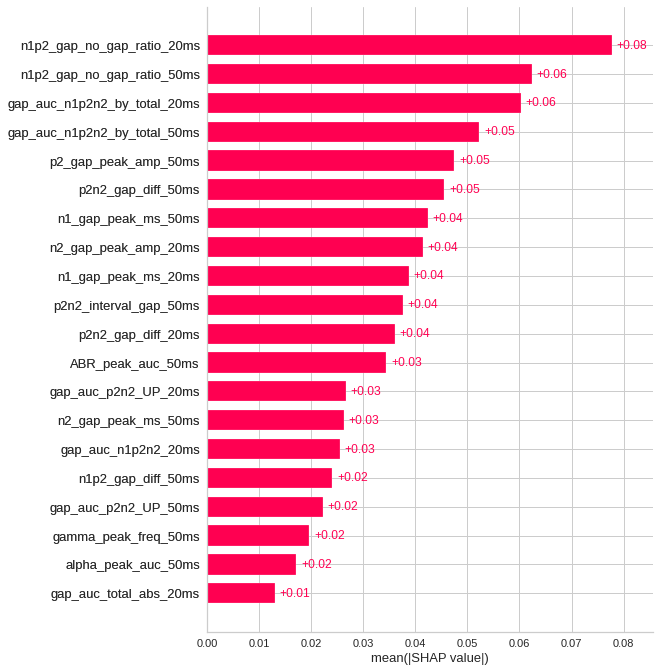

Global Explaination


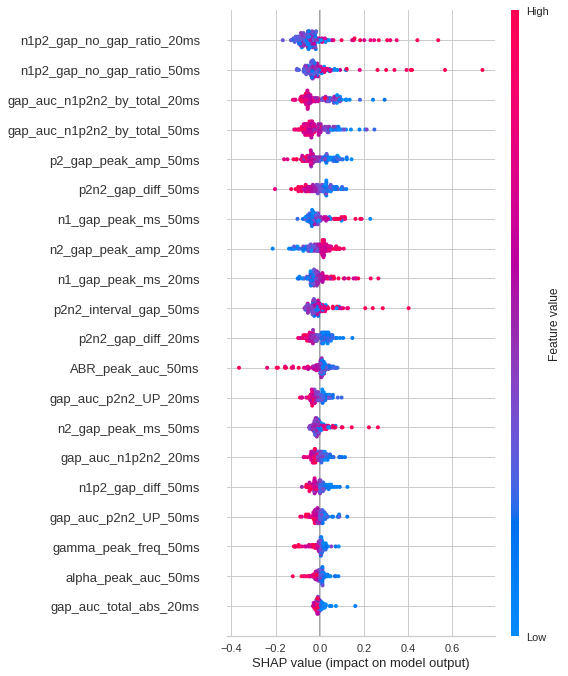

---------------------
Local Explaination


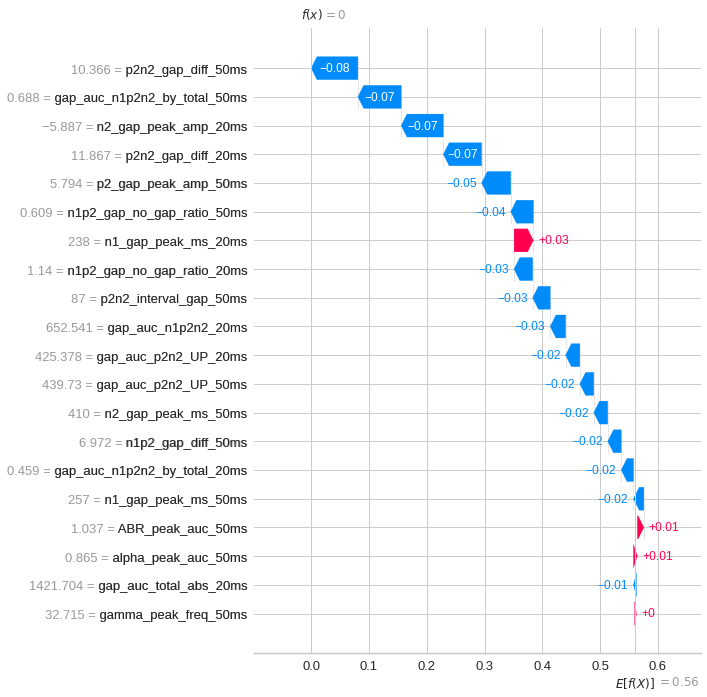

Local Explaination


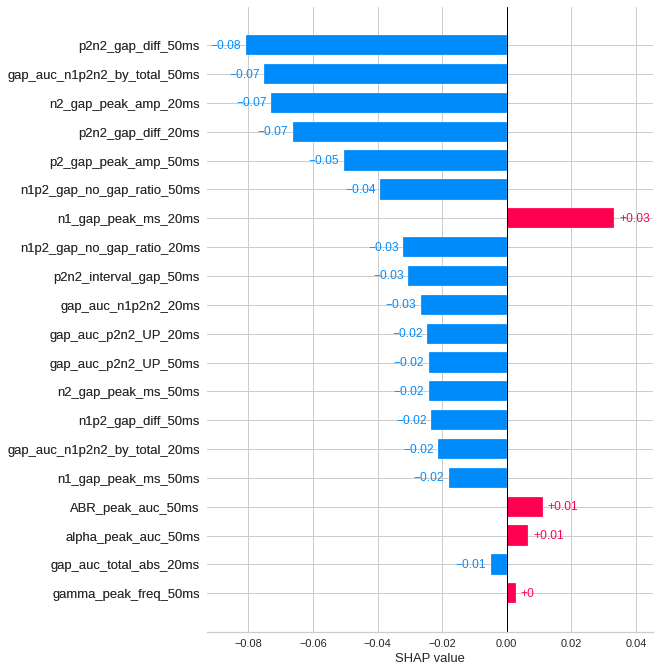

---------------------------------------------------------
---------------------------------------------------------
---------------------------------------------------------
---------------------------------------------------------


In [ ]:
graph_feat={
    "max_display":30,
    "shap_values Index":10
}

for i in range(len(new_keys_7)):
  if new_keys_7[i].value ==True:
    SHAP_EXP(models[i],graph_feat)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

#Confusion Matrix For Testing

In [ ]:
new_keys_6=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=83, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=124, random_state=0)', indent=False…

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=2, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=2, n_estimators=124, random_state=0)',…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=25, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=3, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=3, n_estimators=25, random_state=0)', inde…

Checkbox(value=False, description='XGBClassifier()', indent=False)

Checkbox(value=False, description='XGBClassifier()', indent=False)

Checkbox(value=False, description='XGBClassifier(n_estimators=3)', indent=False)

Checkbox(value=False, description='XGBClassifier(n_estimators=3)', indent=False)

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=4)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

In [ ]:

from yellowbrick.classifier import ConfusionMatrix


for i in range(len(new_keys_6)):
  if new_keys_6[i].value ==True:
    cm = ConfusionMatrix(models[i], classes=classes)

    cm.fit(X_train, y_train)
    cm.score(X_test, y_test)
    cm.show()

#Confusion Matrix For Training

In [ ]:
new_keys_5=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=83, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=124, random_state=0)', indent=False…

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=2, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=2, n_estimators=124, random_state=0)',…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=25, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=3, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=3, n_estimators=25, random_state=0)', inde…

Checkbox(value=False, description='XGBClassifier()', indent=False)

Checkbox(value=False, description='XGBClassifier()', indent=False)

Checkbox(value=False, description='XGBClassifier(n_estimators=3)', indent=False)

Checkbox(value=False, description='XGBClassifier(n_estimators=3)', indent=False)

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=4)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

In [ ]:

for i in range(len(new_keys_5)):
  if new_keys_5[i].value ==True:
    cm = ConfusionMatrix(models[i], classes=classes)

    cm.fit(X_train, y_train)
    cm.score(X_train, y_train)
    cm.show()
    print("-------------------------------")
    print("-------------------------------")

#Result CSV<br>
Predicted and Actual Row will be added at the end index

In [ ]:
def reverse_transfrom(my_list):
  for i in range(len(my_list)):
    if my_list[i] == 0:
      my_list[i] = 'Control'
    else:
      my_list[i] = 'Patient'
  return my_list

In [ ]:
new_keys_4=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=83, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=124, random_state=0)', indent=False…

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=2, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=2, n_estimators=124, random_state=0)',…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=25, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=3, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=3, n_estimators=25, random_state=0)', inde…

Checkbox(value=False, description='XGBClassifier()', indent=False)

Checkbox(value=False, description='XGBClassifier()', indent=False)

Checkbox(value=False, description='XGBClassifier(n_estimators=3)', indent=False)

Checkbox(value=False, description='XGBClassifier(n_estimators=3)', indent=False)

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=4)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

In [ ]:
for i in range(len(new_keys_4)):
  if new_keys_4[i].value ==True:
    temp=X_test

    prediction_cls = reverse_transfrom(list(models[i].predict(X_test[0:])))
    actual_cls = reverse_transfrom(list(y_test[0:]))

    temp["Actual"] = actual_cls
    temp["Predicted"] = prediction_cls

    temp.to_csv(str(models[i])+".csv")

#ROC Comparaing Machine Learning Models

In [ ]:

def ROC(mod,X_t,y_t,graph_feat):
  r_probs = [0 for _ in range(len(y_t))]

  model_probs = []


  for i in mod:
    model_probs.append(i.predict_proba(X_t))


  model_probs2=[]

  for i in model_probs:
    model_probs2.append(i[:,1])


  from sklearn.metrics import roc_curve, roc_auc_score

  model_auc=[]
  r_auc = roc_auc_score(y_t, r_probs)

  for i in model_probs2:
    model_auc.append(roc_auc_score(y_t,i))


  fpr_tpr=[]
  r_fpr, r_tpr, _ = roc_curve(y_t, r_probs)

  for i in model_probs2:
    fpr, tpr, _ = roc_curve(y_t, i)
    fpr_tpr.append((fpr,tpr))

  import matplotlib.pyplot as plt
  plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)

  for i in range(len(model_auc)):
    plt.plot(fpr_tpr[i][0], fpr_tpr[i][1], marker='.', label=str(mod[i])+' (AUROC = %0.3f)' % model_auc[i])

  # Title
  plt.title('ROC Plot Testing',fontsize= graph_feat["Title Size"], fontweight=graph_feat["Title Fontweight"])
  plt.xlabel('False Positive Rate',fontweight=graph_feat["X axis Label Fontweight"],fontsize=graph_feat["X axis Label Font Size"])
  plt.ylabel('True Positive Rate',fontweight=graph_feat["Y axis Label Fontweight"],fontsize=graph_feat["Y axis Label Font Size"])
  
  plt.legend( 
           prop = {'size' : graph_feat["legend Font Size"]}, 
           loc = graph_feat["legend Position"])
  
  fig = plt.gcf()
  fig.set_size_inches(graph_feat["Fig Width (inches)"], graph_feat["Fig Height (inches)"])
  fig.savefig(graph_feat["Fig Saving Name"], dpi=graph_feat["dpi"])
  plt.show()

***Training ROC***<br>
Chosse the Models

In [ ]:
new_keys_2=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=83, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=124, random_state=0)', indent=False…

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=2, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=2, n_estimators=124, random_state=0)',…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=25, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=3, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=3, n_estimators=25, random_state=0)', inde…

Checkbox(value=False, description='XGBClassifier()', indent=False)

Checkbox(value=False, description='XGBClassifier()', indent=False)

Checkbox(value=False, description='XGBClassifier(n_estimators=3)', indent=False)

Checkbox(value=False, description='XGBClassifier(n_estimators=3)', indent=False)

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=4)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)


Change  the given dictionary of graph feature for desire graph.

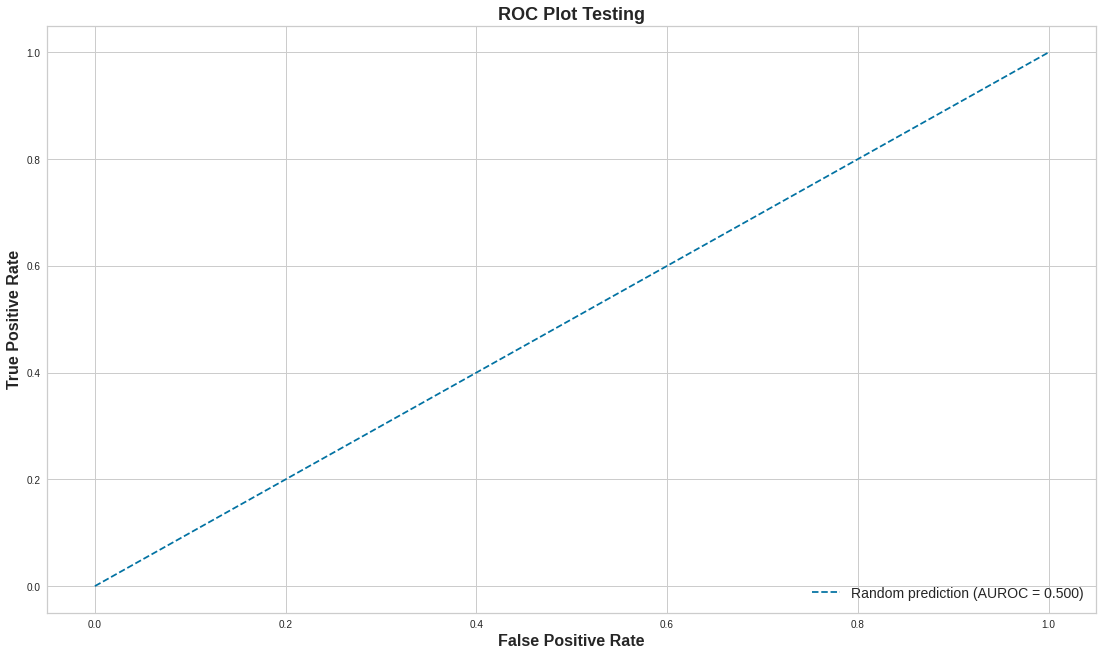

In [ ]:
graph_feat={
    "Title Size":18,
    "Title Fontweight":'bold',

    "legend Font Size": 14,
    "legend Position": "lower right",

    "X axis Label Font Size":16,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":16,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_training.png",
    "dpi":100

}

mod=[]
for i in range(len(new_keys_2)):
  if new_keys_2[i].value ==True:
    mod.append(models[i])

ROC(mod,X_train,y_train,graph_feat)



---



***Testing ROC***<br>
Chosse the Models

In [ ]:
new_keys_3=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=83, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=124, random_state=0)', indent=False…

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=2, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=2, n_estimators=124, random_state=0)',…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=25, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=3, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=3, n_estimators=25, random_state=0)', inde…

Checkbox(value=False, description='XGBClassifier()', indent=False)

Checkbox(value=False, description='XGBClassifier()', indent=False)

Checkbox(value=False, description='XGBClassifier(n_estimators=3)', indent=False)

Checkbox(value=False, description='XGBClassifier(n_estimators=3)', indent=False)

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=4)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)


Change  the given dictionary of graph feature for desire graph.

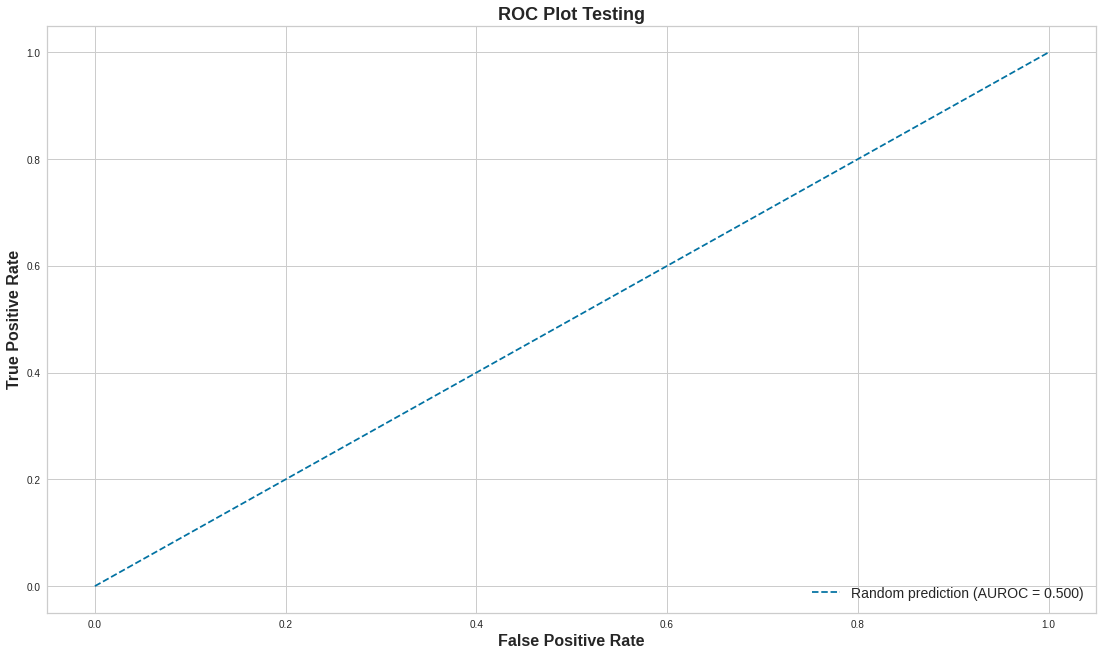

In [ ]:
graph_feat={
    "Title Size":18,
    "Title Fontweight":'bold',

    "legend Font Size": 14,
    "legend Position": "lower right",

    "X axis Label Font Size":16,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":16,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_testing.png",
    "dpi":100

}

mod=[]
for i in range(len(new_keys_3)):
  if new_keys_3[i].value ==True:
    mod.append(models[i])

ROC(mod,X_test,y_test,graph_feat)

#Cross_val_score function

In [ ]:
from sklearn.model_selection import cross_val_score

k=5
for i in result:
  print(i[0]," -> Accuracy: ",result[i])
  l=list(cross_val_score(i[0],X_new.iloc[:,1:], y_new,cv=k))
  avg=sum(l)/k
  print(i[0]," -> AVG Accurecy After CV: "+str(avg)+ " (For "+str(k)+" Fold)")
  print("--------------------------------------------------------------------------")

AdaBoostClassifier(random_state=0)  -> Accuracy:  0.65625
AdaBoostClassifier(random_state=0)  -> AVG Accurecy After CV: 0.6242424242424243 (For 5 Fold)
--------------------------------------------------------------------------
AdaBoostClassifier(n_estimators=83, random_state=0)  -> Accuracy:  0.78125
AdaBoostClassifier(n_estimators=83, random_state=0)  -> AVG Accurecy After CV: 0.6727272727272727 (For 5 Fold)
--------------------------------------------------------------------------
GradientBoostingClassifier(random_state=0)  -> Accuracy:  0.625
GradientBoostingClassifier(random_state=0)  -> AVG Accurecy After CV: 0.6424242424242425 (For 5 Fold)
--------------------------------------------------------------------------
GradientBoostingClassifier(n_estimators=124, random_state=0)  -> Accuracy:  0.65625
GradientBoostingClassifier(n_estimators=124, random_state=0)  -> AVG Accurecy After CV: 0.6484848484848486 (For 5 Fold)
-------------------------------------------------------------------

In [ ]:


def CV_ROC(model,folds,graph_feat):
  import matplotlib.pyplot as plt

  from sklearn import svm
  from sklearn.metrics import auc,roc_curve
  from sklearn.metrics import RocCurveDisplay
  from sklearn.model_selection import StratifiedKFold


  cv = StratifiedKFold(n_splits=folds)



  tprs = []
  aucs = []
  mean_fpr = np.linspace(0,1,100)
  i = 1
  for train,test in cv.split(X_new.iloc[:,1:], y_new.values):
      prediction = model.fit(X_new.iloc[:,1:].values[train], y_new.values[train]).predict_proba(X_new.iloc[:,1:].values[test])
      fpr, tpr, t = roc_curve(y_new.values[test], prediction[:, 1])
      tprs.append(np.interp(mean_fpr, fpr, tpr))
      roc_auc = auc(fpr, tpr)
      aucs.append(roc_auc)
      plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
      i= i+1

  plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
  mean_tpr = np.mean(tprs, axis=0)
  mean_auc = auc(mean_fpr, mean_tpr)
  plt.plot(mean_fpr, mean_tpr, color='blue',
          label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

  plt.title('CV-ROC-> '+str(model),fontsize= graph_feat["Title Size"], fontweight=graph_feat["Title Fontweight"])
  plt.xlabel('False Positive Rate',fontweight=graph_feat["X axis Label Fontweight"],fontsize=graph_feat["X axis Label Font Size"])
  plt.ylabel('True Positive Rate',fontweight=graph_feat["Y axis Label Fontweight"],fontsize=graph_feat["Y axis Label Font Size"])
  plt.legend( 
           prop = {'size' : graph_feat["legend Font Size"]}, 
           loc = graph_feat["legend Position"])
  
  fig = plt.gcf()
  fig.set_size_inches(graph_feat["Fig Width (inches)"], graph_feat["Fig Height (inches)"])
  fig.savefig(graph_feat["Fig Saving Name"], dpi=graph_feat["dpi"])
  plt.show()

In [ ]:
new_keys=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=83, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=124, random_state=0)', indent=False…

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=2, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=2, n_estimators=124, random_state=0)',…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=25, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=3, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=3, n_estimators=25, random_state=0)', inde…

Checkbox(value=False, description='XGBClassifier()', indent=False)

Checkbox(value=False, description='XGBClassifier()', indent=False)

Checkbox(value=False, description='XGBClassifier(n_estimators=3)', indent=False)

Checkbox(value=False, description='XGBClassifier(n_estimators=3)', indent=False)

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=4)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

<font color="apple green">Just mark the above cell to select the Multiple Algorithms for ROC CV graph. <font color="sky blue"><b>Then run the cell below after selecting.</b></font> You do not need to run above cell everytime...</font><font color='red'><b>Do not run above cell after selecting</b></font>

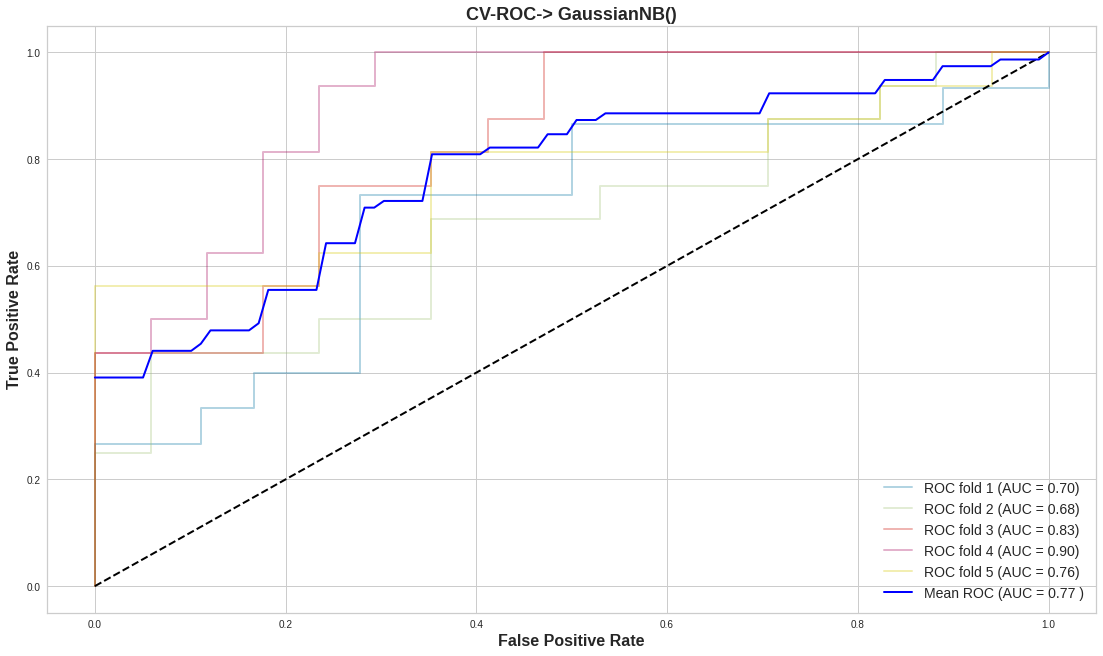

-----------------------------------------------------------------
-----------------------------------------------------------------


In [ ]:
# run this cell after selecting

graph_feat={
    "Title Size":18,
    "Title Fontweight":'bold',

    "legend Font Size": 14,
    "legend Position": "lower right",

    "X axis Label Font Size":16,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":16,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_testing.png",
    "dpi":100

}





k_fold=5

for i in range(len(new_keys)):
  if new_keys[i].value ==True:
    CV_ROC(models[i],5,graph_feat)
    print("-----------------------------------------------------------------")
    print("-----------------------------------------------------------------")

#ANN Classification